# Final Project - Data Prepossesing Part

##### Yixuan WANG

In [1]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [2]:
from tqdm import tqdm
from time import sleep

In [3]:
import pydicom
import pylab
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [45]:
train_dir = os.path.join("/Users/yixuanwang/Desktop/2020 F Final_Project/Lung-PET-CT-Dx/Lung_Dx-G0002/09-05-2004-Chest-90693/2.000000-5mm-83475")
label_dir = os.path.join("/Users/yixuanwang/Desktop/2020 F Final_Project/Annotation")
print(train_dir)

/Users/yixuanwang/Desktop/2020 F Final_Project/Lung-PET-CT-Dx/Lung_Dx-G0002/09-05-2004-Chest-90693/2.000000-5mm-83475


In [50]:
train_image_names = os.listdir(train_dir)
train_labels_names = os.listdir(label_dir)

In [28]:
print(train_image_names)

['1-42.dcm', '1-56.dcm', '1-57.dcm', '1-43.dcm', '1-55.dcm', '1-41.dcm', '1-40.dcm', '1-54.dcm', '1-50.dcm', '1-44.dcm', '1-45.dcm', '1-51.dcm', '1-47.dcm', '1-53.dcm', '1-52.dcm', '1-46.dcm', '1-21.dcm', '1-35.dcm', '1-09.dcm', '1-08.dcm', '1-34.dcm', '1-20.dcm', '1-36.dcm', '1-22.dcm', '1-23.dcm', '1-37.dcm', '1-33.dcm', '1-27.dcm', '1-26.dcm', '1-32.dcm', '1-18.dcm', '1-24.dcm', '1-30.dcm', '1-31.dcm', '1-25.dcm', '1-19.dcm', '1-14.dcm', '1-28.dcm', '1-29.dcm', '1-15.dcm', '1-01.dcm', '1-17.dcm', '1-03.dcm', '1-02.dcm', '1-16.dcm', '1-12.dcm', '1-06.dcm', '1-07.dcm', '1-13.dcm', '1-39.dcm', '1-05.dcm', '1-11.dcm', '1-10.dcm', '1-04.dcm', '1-38.dcm', '1-63.dcm', '1-62.dcm', '1-60.dcm', '1-48.dcm', '1-49.dcm', '1-61.dcm', '1-59.dcm', '1-64.dcm', '1-58.dcm']


In [24]:
print(train_labels_names)

['E0001', 'G0001', '.DS_Store', 'B0001', 'A0001', 'G0003', 'G0004', 'E0002', 'E0005', 'G0005', 'G0002', 'E0004', 'E0003', 'A0003', 'A0004', 'B0005', 'B0002', 'B0003', 'B0004', 'A0005', 'A0002']


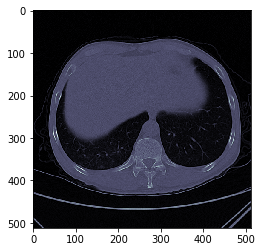

In [52]:
ds = pydicom.read_file(train_dir +"/" + train_image_names[8])
pix = ds.pixel_array
pylab.imshow(pix, cmap=pylab.cm.bone)
pylab.show()

In [8]:
cancer_dict={
    'A':0,
    'B':1,
    'E':2,
    'G':3,}

In [9]:
#skimage.io.imread()
#skimage.color.rgb2gray()
import os
import skimage.io
import skimage.color

In [10]:
def list_with_no_hidden(path):
    os_list = os.listdir(path)
    for item in os_list:
        if item.startswith('.') and os.path.isfile(os.path.join(path, item)):
            os_list.remove(item)
    return os_list

In [11]:
data_dir = '/Users/yixuanwang/Desktop/2020 F Final_Project/Lung-PET-CT-Dx'#文件地址/名称 
classes=list_with_no_hidden(data_dir)

In [12]:
print(classes)

['Lung_Dx-G0002', 'Lung_Dx-G0005', 'Lung_Dx-E0003', 'Lung_Dx-E0004', 'Lung_Dx-G0004', 'Lung_Dx-G0003', 'Lung_Dx-E0005', 'Lung_Dx-E0002', 'Lung_Dx-B0004', 'Lung_Dx-B0003', 'Lung_Dx-A0002', 'Lung_Dx-A0005', 'Lung_Dx-A0004', 'Lung_Dx-A0003', 'Lung_Dx-B0002', 'Lung_Dx-B0005', 'Lung_Dx-G0001', 'Lung_Dx-E0001', 'Lung_Dx-A0001', 'Lung_Dx-B0001']


In [13]:
data = []

for cls in tqdm(classes):
    Chests = list_with_no_hidden(data_dir+'/'+cls)
    result_type = cancer_dict[cls[8]]####<--------------------cancer type
    for chest in Chests:
        File = list_with_no_hidden(data_dir+'/'+cls+"/"+chest)
        for file in File:
            Img = list_with_no_hidden(data_dir+'/'+cls+"/"+chest+'/'+file)
            for img in Img:
                ds = pydicom.read_file(data_dir+'/'+cls+"/"+chest+"/"+file+"/"+img)
                pix = ds.pixel_array
                pix_array = pix.reshape(pix.shape[0]*pix.shape[1], )
                
                pix_array = np.append(pix_array, result_type)
                
                data.append(pix_array)
    sleep(0.5)

100%|██████████| 20/20 [00:23<00:00,  1.16s/it]


In [19]:
data[0:5] # show the first 5 rows of the data

[array([22, 23, 24, ..., 31, 29,  3]),
 array([23, 25, 30, ..., 26, 27,  3]),
 array([28, 32, 27, ..., 30, 32,  3]),
 array([28, 32, 26, ..., 33, 35,  3]),
 array([28, 37, 30, ..., 26, 29,  3])]

In [14]:
np_data = np.array(data) # transfer to np array

In [56]:
np_data

array([[   22,    23,    24, ...,    31,    29,     3],
       [   23,    25,    30, ...,    26,    27,     3],
       [   28,    32,    27, ...,    30,    32,     3],
       ...,
       [-2000, -2000, -2000, ..., -2000, -2000,     1],
       [-2000, -2000, -2000, ..., -2000, -2000,     1],
       [-2000, -2000, -2000, ..., -2000, -2000,     1]])

In [57]:
np_data.shape #shape of the trained data

(2739, 262145)

In [62]:
np.savetxt("/Users/yixuanwang/Desktop/2020 F Final_Project/data.txt", np_data)